#**Open AI Gym Toolkit**

In [ ]:
import sys
colab_active = 'google.colab' in sys.modules
print("Colab Active: ", colab_active)

Colab Active:  True


#**Gym Update**

In [ ]:
import os
os.system("pip install gym==0.17.3")
if colab_active is True: 
  os.system("apt-get install python-opengl -y")
  os.system("apt install xvfb -y")
  os.system("pip install pyvirtualdisplay")
  os.system("pip install piglet")

#**All Imports**

In [ ]:
import gym

if colab_active is True: 
  from pyvirtualdisplay import Display
  Display().start()

  from IPython import display
  import matplotlib.pyplot as plt
  %matplotlib inline

#**All Globals**

In [ ]:
num_episodes = 10
num_timesteps = 50
verbose = True

#**Initialization for Some Visual Environments like Cart Pole**

In [ ]:
gym.__version__

'0.17.3'

#**Frozen Lake Environment**

#**Environment Creation**

We can recall and create the desired gym environment by the **make** function

In the frozen lake environment, the goal of the agent is to start from the initial state **S** and achieve the goal state **G**. **S** denotes the starting state, **F** denotes the frozen state, **H** denotes the hole state and **G** denotes the goal state. 

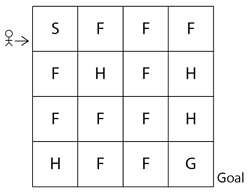

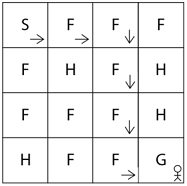

In [ ]:
env = gym.make("FrozenLake-v0")

#**Environment Rendering**

After the environment creation we need to depict it by the  render function:

In [ ]:
env.render()


SFFF
FHFH
FFFH
HFFG


#**State Space**

A state space consists of all of our states. We can obtain the number of states in our environment by just typing ***env.observation_space***

In [ ]:
print(env.observation_space)

Discrete(16)


#**Action Space**

In [ ]:
print(env.action_space)

Discrete(4)


#**Transition Probabilities**

In [ ]:
print(env.P[0][2])

[(0.3333333333333333, 4, 0.0, False), (0.3333333333333333, 1, 0.0, False), (0.3333333333333333, 0, 0.0, False)]


In [ ]:
print(env.P[3][1])

[(0.3333333333333333, 2, 0.0, False), (0.3333333333333333, 7, 0.0, True), (0.3333333333333333, 3, 0.0, False)]


#**Rendering Environment Closing**

In [ ]:
env.close()

#**Cart Pole Environment**

In [ ]:
env = gym.make("CartPole-v0")

#**Environment Rendering**

Since Colab cannot display Graphic Environments we adopt a trick, we make use of Matplotlib to display the environment in it

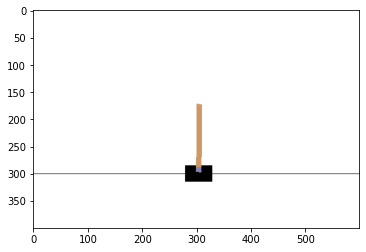

In [ ]:
env.reset()
if colab_active is True: 
  img = plt.imshow(env.render('rgb_array')) 
else: 
  env.render()

In [ ]:
print(env.observation_space)

Box(-3.4028234663852886e+38, 3.4028234663852886e+38, (4,), float32)


In [ ]:
print(env.observation_space.high)

[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [ ]:
print(env.observation_space.low)

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]


In [ ]:
print(env.action_space)

Discrete(2)


#**Cart Pole Balancing with Random Policy**

The **agent** that selects a **random** action in the environment and tries to balance the pole. The agent receives +1 reward every time the pole stands straight up on the cart. We will generate over 100 episodes and we will see the return (sum of rewards) obtained over each episode. 

The algorithm is made of the following steps: 

Set the **return** to 0. Initialize the state by resetting the environment for each step in the episode. Then, randomly select an action by sampling from the actions space of the **environment**. Perform the randomly selected **action** and update the return. If the next state is a **terminal** state then end the episode for every 10 episodes, print the return (sum of rewards).

[-0.09423113  0.80500473 -0.76576081 -3.81067604] 0.0 True {}


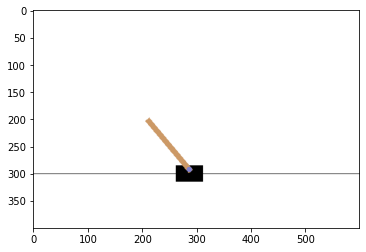

In [ ]:
returns = []
for i in range(num_episodes):
  Return = 0
  state = env.reset()
  if colab_active is True: 
    img = plt.imshow(env.render('rgb_array')) # only call this once
  for t in range(num_timesteps):
    if colab_active is True: 
      img.set_data(env.render('rgb_array')) 
      display.display(plt.gcf())
      display.clear_output(wait=True)
    else: 
      env.render()

    random_action = env.action_space.sample()
    next_state, reward, done, info = env.step(random_action)
    if verbose is True: 
      print(next_state, reward, done, info)

    Return = Return + reward

    returns.append(Return)

In [ ]:
print("Rewards: ")
print(returns)

Rewards: 
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 24.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0,

#**Rendering Environment Closing**

In [ ]:
env.close()

#**Homeworks**

1) Try to import other Gym environments and render them, inspect action and state spaces and other env features. You can try to use the following code to list all the available gym envs: 

In [ ]:
for i in gym.envs.registry.all():
  print(i.id)